# Customer Churn Project

In [210]:
#importing essential libraries that would be required.
import pandas as pd
import numpy as np

In [211]:
#reading the csv file and creating dataset in df variable
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [212]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [213]:
#this could helps to get the information about the data set in the variable named df.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [214]:
#this code tells the no of rows and columns present in the dataset.
df.shape

(7043, 21)

In [215]:
#this code tells the data type of the columns present in dataset.
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [216]:
#this code gives top five rows from the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [217]:
#this code give last 5 rows of the dataset.
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [218]:
#this gives the sample row from the dataset
df.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4812,5174-RNGBH,Female,0,No,No,9,Yes,No,DSL,No,...,No,Yes,Yes,No,Month-to-month,No,Mailed check,66.25,620.55,Yes


In [219]:
#this gives the column name from the dataset
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# CHECKING FOR THE DUPLICATED VALUES IN THE TABLE OR DATASET

In [220]:
df.duplicated().sum()

0

there are 0 duplicate values present in the data

# CHECKING FOR THE UNIQUE VALUES IN THE TABLE OR DATASET

# checking unique values in the whole dataset

In [221]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

# Checking for the Null Values

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [223]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Text(0.5, 1.0, 'Null Values')

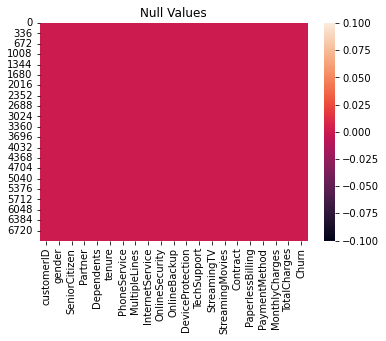

In [224]:
sns.heatmap(df.isnull())
plt.title('Null Values')

As we can see there are no null values present in the data set

# EDA

# Visualization Of The Data

# 1 pairplot

<function matplotlib.pyplot.show(close=None, block=None)>

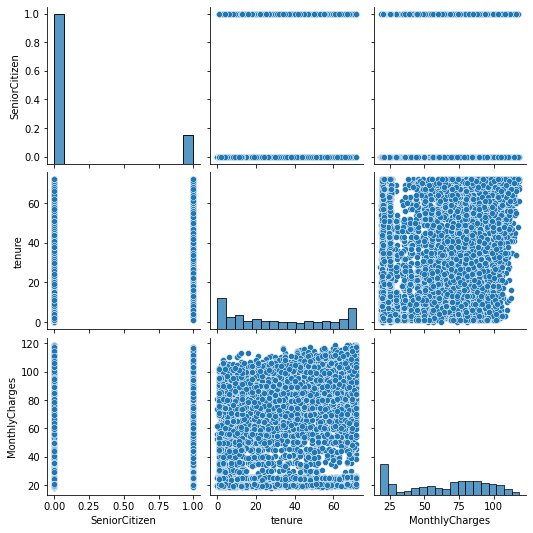

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(df)
plt.show

# 2 histogram

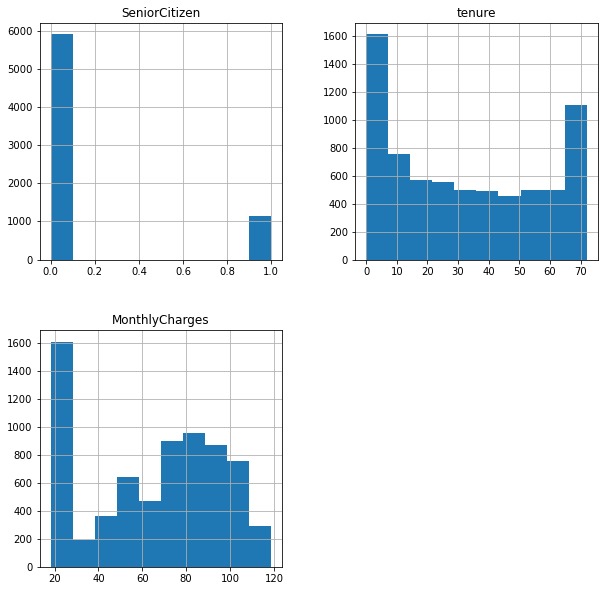

In [226]:
df.hist(bins=10,figsize=(10,10))
plt.show()

# countplot

Male      3555
Female    3488
Name: gender, dtype: int64

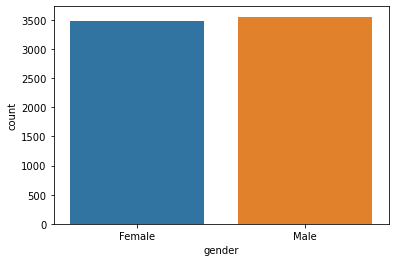

In [227]:
sns.countplot(df['gender'])
df['gender'].value_counts()

this graph tells the gender of the existing customer

among all the customers males are more = 3555

then females = 3488

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

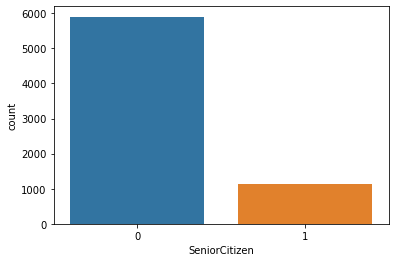

In [228]:
sns.countplot(df['SeniorCitizen'])
df['SeniorCitizen'].value_counts()

this graph tells how many of the users are senior citizen among all the users

among all the users 5901 people are not senior citizen

among 1142 people are senior citizen


No     3641
Yes    3402
Name: Partner, dtype: int64

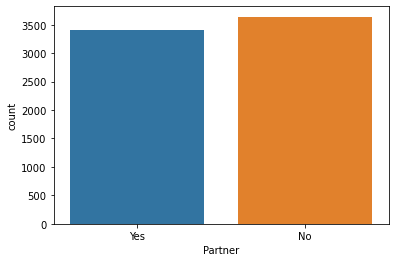

In [229]:
sns.countplot(df['Partner'])
df['Partner'].value_counts()

this graph tells among all the users how many of them have partners

3402 of all the users have partners

3641 of all the users don't have partners

No     4933
Yes    2110
Name: Dependents, dtype: int64

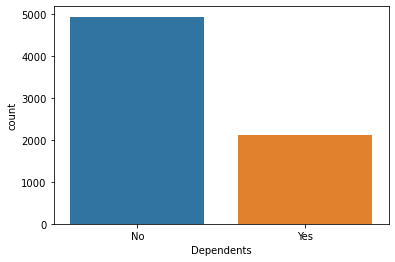

In [259]:
sns.countplot(df['Dependents'])
df['Dependents'].value_counts()

this graph tells how much of them are dependents or not

among all 2110 people are dependent

and 4933 people are not dependent

Yes    6361
No      682
Name: PhoneService, dtype: int64

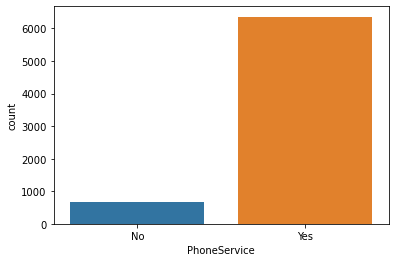

In [231]:
sns.countplot(df['PhoneService'])
df['PhoneService'].value_counts()

this graph tells how many of them are taking phone services and how many of them are not taking

among all 6361 people are taking services

and 682 people are not taking

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

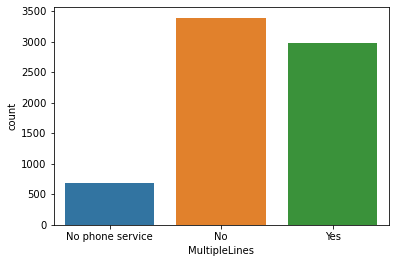

In [260]:
sns.countplot(df['MultipleLines'])
df['MultipleLines'].value_counts()

this graph tell how many people among all are using multiple lines or not

3390 people not having multiple lines most of them

2971 people having multiple lines

682 people having no phone service

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

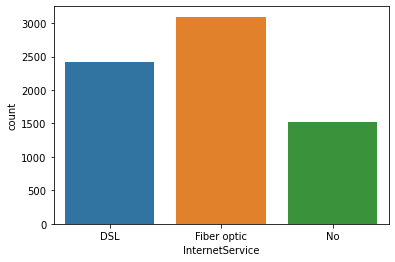

In [233]:
sns.countplot(df['InternetService'])
df['InternetService'].value_counts()

this graph tells how many of them have what type of InternetService among all people

3096 people among mostly have fiber optic

2421 people then have DSL

and 1526 people have no internet services

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

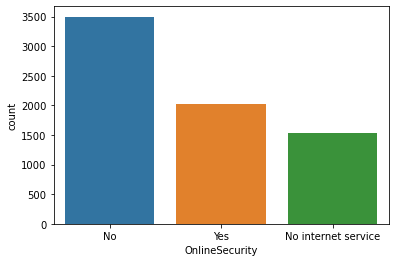

In [234]:
sns.countplot(df['OnlineSecurity'])
df['OnlineSecurity'].value_counts()

In [ ]:
this graph tells how many of them have OnlineSecurity among all people

3498 people among all don't have OnlineSecurity

2019 people have OnlineSecurity

and 1526 people have no internet services

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

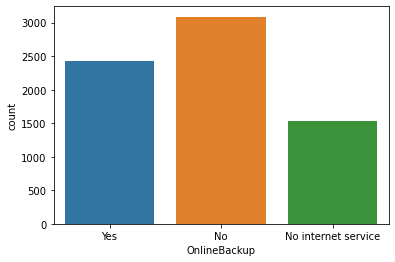

In [235]:
sns.countplot(df['OnlineBackup'])
df['OnlineBackup'].value_counts()

this graph tells how many of them have OnlineBackup among all people

3088 people among all don't have OnlineBackup

2429 people have OnlineBackup

and 1526 people have no internet services

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

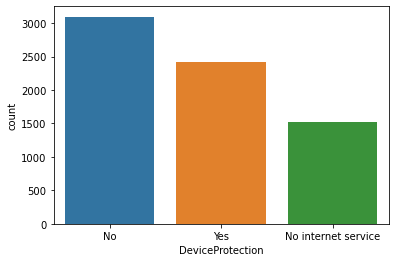

In [236]:
sns.countplot(df['DeviceProtection'])
df['DeviceProtection'].value_counts()

this graph tells how many of them have device protection among all people

3095 people among all don't have device protection

2422 people have device protection

and 1526 people have no internet services

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

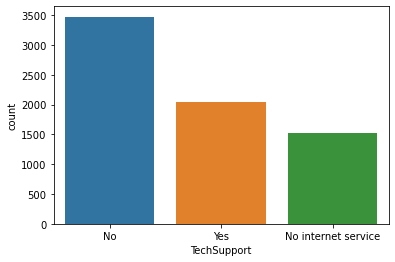

In [237]:
sns.countplot(df['TechSupport'])
df['TechSupport'].value_counts()

this graph tells how many of them have TechSupport among all people

3473 people among all don't have TechSupport

2044 people have TechSupport

and 1526 people have no internet services

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

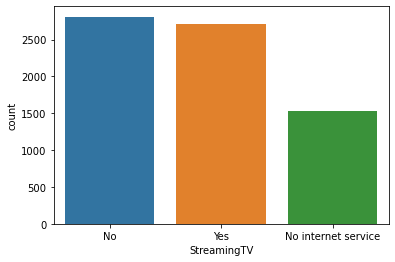

In [238]:
sns.countplot(df['StreamingTV'])
df['StreamingTV'].value_counts()

this graph tells how many of them have StreamingTV among all people

2810 people among all don't have StreamingTV

2707 people have StreamingTV

and 1526 people have no internet services

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

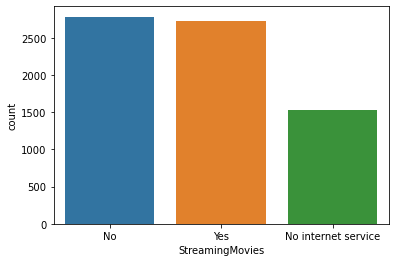

In [239]:
sns.countplot(df['StreamingMovies'])
df['StreamingMovies'].value_counts()

this graph tells how many of them have StreamingMovies among all people

2785 people among all don't have StreamingMovies

2732 people have StreamingMovies

and 1526 people have no internet services

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

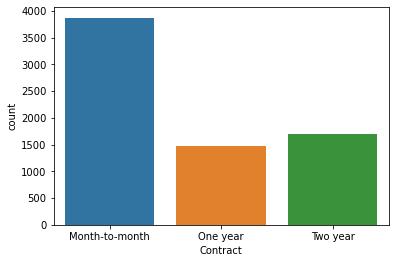

In [240]:
sns.countplot(df['Contract'])
df['Contract'].value_counts()

this graph shows the contract that customers have opted for

most of the people have choosed month to month 3875

then followed by 2 yr 1695

then followed by 1 yr 1473

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

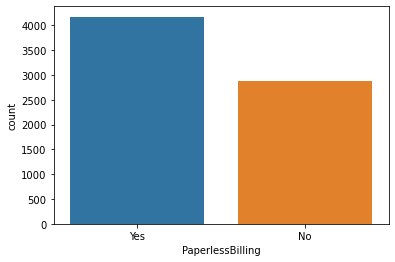

In [241]:
sns.countplot(df['PaperlessBilling'])
df['PaperlessBilling'].value_counts()

this graph shows how many people do prefer paper less billing

4171 this much people says yes they do prefer

2872 this much says no prefer

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

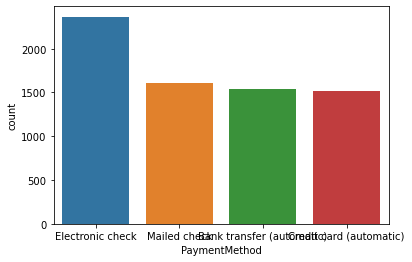

In [242]:
sns.countplot(df['PaymentMethod'])
df['PaymentMethod'].value_counts()

most of the people make payment using electronic check 2365

then followed by mailed check 1612

then by bank transfer (automatic) 1544
 
then by credit card (automatic) 1522

No     5174
Yes    1869
Name: Churn, dtype: int64

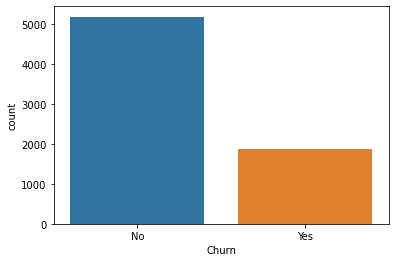

In [243]:
sns.countplot(df['Churn'])
df['Churn'].value_counts()

this graph tells how many of the customer are going to churn or not

among all 5174 the people are not going to churn 

and 1869 will churn

# Violinplot

<AxesSubplot:xlabel='MonthlyCharges'>

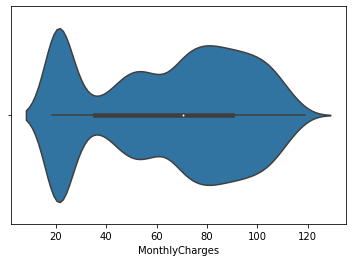

In [254]:
sns.violinplot(x='MonthlyCharges',data=df)

<AxesSubplot:xlabel='tenure'>

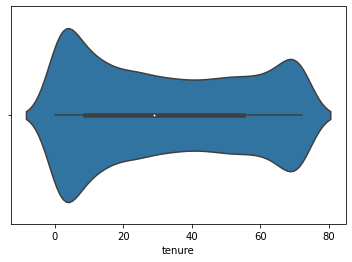

In [257]:
sns.violinplot(x='tenure',data=df)

# Displot

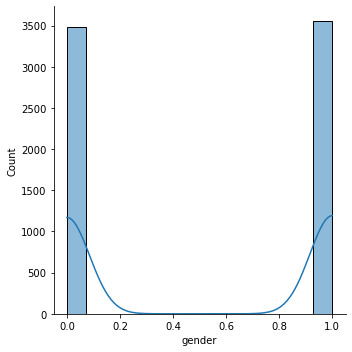

In [163]:
sns.displot(df['gender'],kde=True)

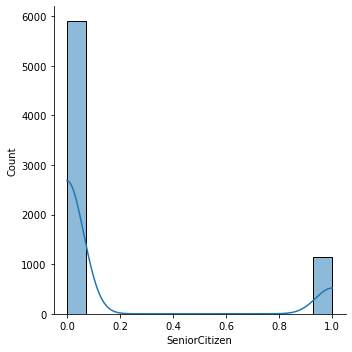

In [164]:
sns.displot(df['SeniorCitizen'],kde=True)

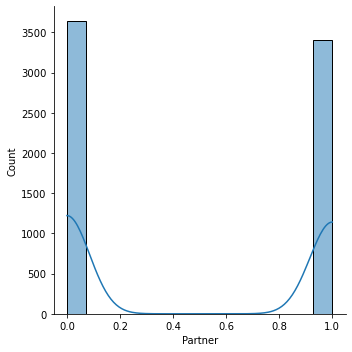

In [165]:
sns.displot(df['Partner'],kde=True)

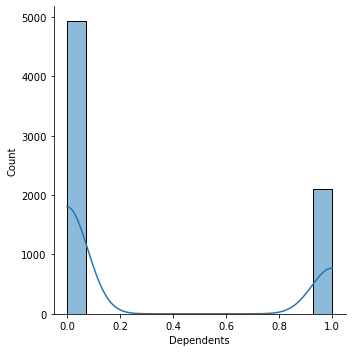

In [166]:
sns.displot(df['Dependents'],kde=True)

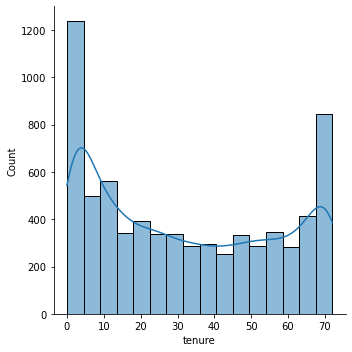

In [167]:
sns.displot(df['tenure'],kde=True)

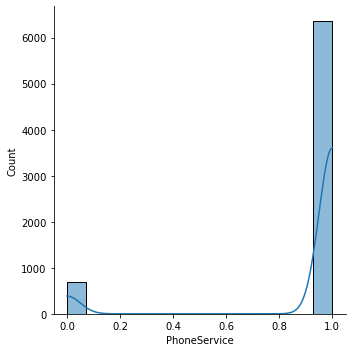

In [168]:
sns.displot(df['PhoneService'],kde=True)

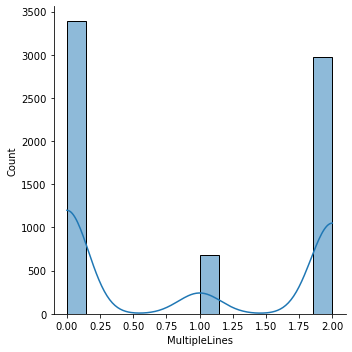

In [169]:
sns.displot(df['MultipleLines'],kde=True)

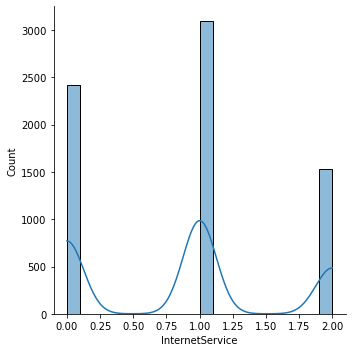

In [170]:
sns.displot(df['InternetService'],kde=True)

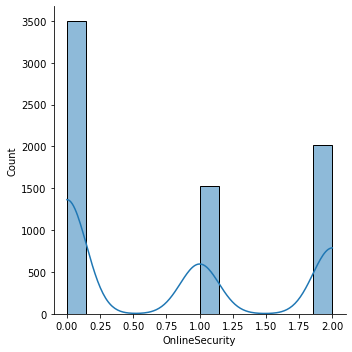

In [171]:
sns.displot(df['OnlineSecurity'],kde=True)

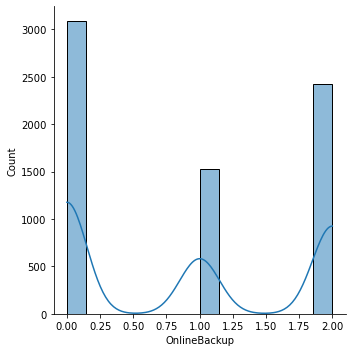

In [172]:
sns.displot(df['OnlineBackup'],kde=True)

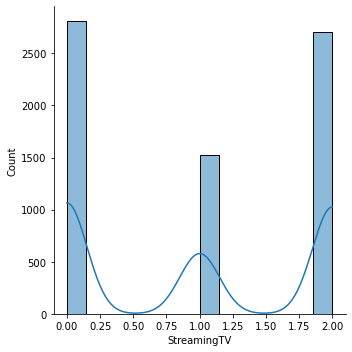

In [173]:
sns.displot(df['StreamingTV'],kde=True)

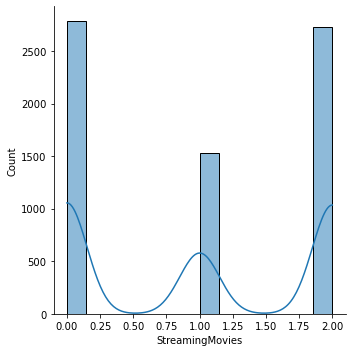

In [174]:
sns.displot(df['StreamingMovies'],kde=True)

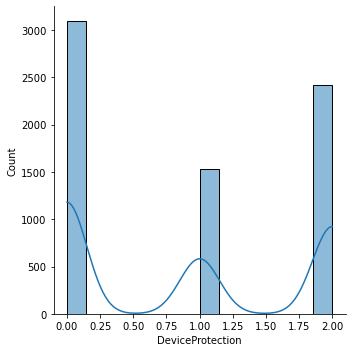

In [175]:
sns.displot(df['DeviceProtection'],kde=True)

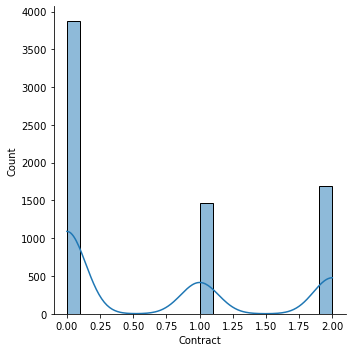

In [176]:
sns.displot(df['Contract'],kde=True)

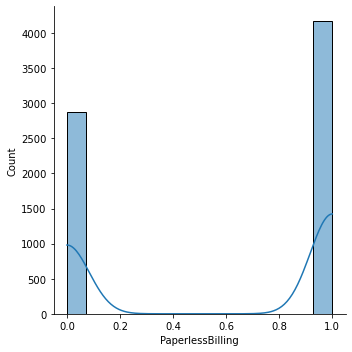

In [177]:
sns.displot(df['PaperlessBilling'],kde=True)

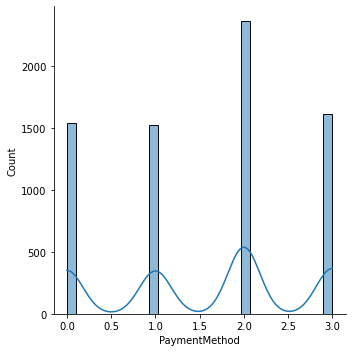

In [178]:
sns.displot(df['PaymentMethod'],kde=True)

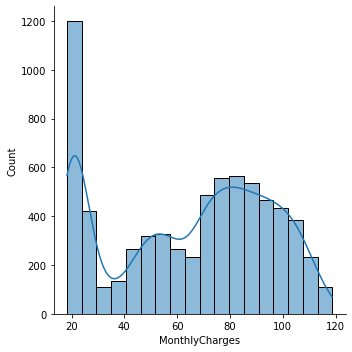

In [179]:
sns.displot(df['MonthlyCharges'],kde=True)

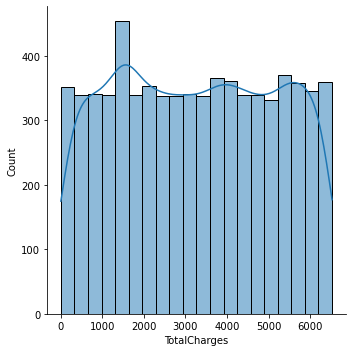

In [180]:
sns.displot(df['TotalCharges'],kde=True)

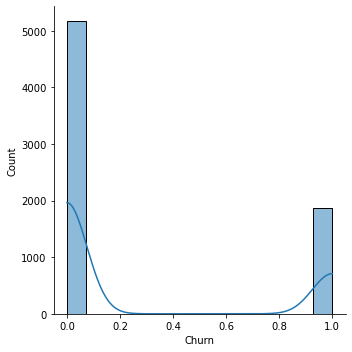

In [181]:
sns.displot(df['Churn'],kde=True)

# Describing Data

In [18]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


<AxesSubplot:>

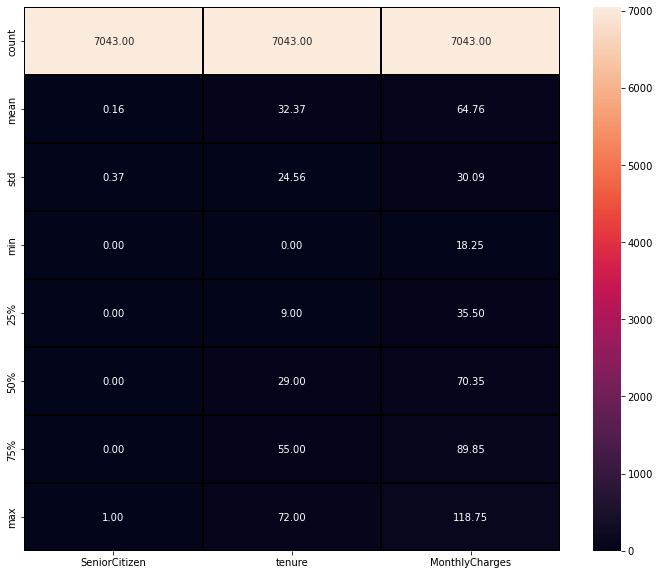

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.heatmap(df.describe(),annot=True,linewidths=2,linecolor='Black',fmt='.2f')

# Encoding Data

# Encoding the categorical columns for furthe processing and model building

In [25]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [23]:
from sklearn import preprocessing

In [24]:
le= preprocessing.LabelEncoder()

In [26]:
df['customerID']= le.fit_transform(df['customerID'])

In [27]:
df['gender']= le.fit_transform(df['gender'])

In [28]:
df['Partner']= le.fit_transform(df['Partner'])

In [29]:
df['Dependents']= le.fit_transform(df['Dependents'])

In [30]:
df['PhoneService']= le.fit_transform(df['PhoneService'])

In [31]:
df['MultipleLines']= le.fit_transform(df['MultipleLines'])

In [32]:
df['InternetService']= le.fit_transform(df['InternetService'])

In [33]:
df['OnlineSecurity']= le.fit_transform(df['OnlineSecurity'])

In [34]:
df['OnlineBackup']= le.fit_transform(df['OnlineBackup'])

In [35]:
df['DeviceProtection']= le.fit_transform(df['DeviceProtection'])

In [36]:
df['TechSupport']= le.fit_transform(df['TechSupport'])

In [37]:
df['StreamingTV']= le.fit_transform(df['StreamingTV'])

In [38]:
df['StreamingMovies']= le.fit_transform(df['StreamingMovies'])

In [39]:
df['Contract']= le.fit_transform(df['Contract'])

In [40]:
df['PaperlessBilling']= le.fit_transform(df['PaperlessBilling'])

In [41]:
df['PaymentMethod']= le.fit_transform(df['PaymentMethod'])

In [42]:
df['TotalCharges']= le.fit_transform(df['TotalCharges'])

In [43]:
df['Churn']= le.fit_transform(df['Churn'])

# Checking correlation of columns with the target variable.

In [44]:
df.corr

<bound method DataFrame.corr of       customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0           5375       0              0        1           0       1   
1           3962       1              0        0           0      34   
2           2564       1              0        0           0       2   
3           5535       1              0        0           0      45   
4           6511       0              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038        4853       1              0        1           1      24   
7039        1525       0              0        1           1      72   
7040        3367       0              0        1           1      11   
7041        5934       1              1        1           0       4   
7042        2226       1              0        0           0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0                0          

In [47]:
df.corr()['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
TotalCharges        0.014479
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

<AxesSubplot:>

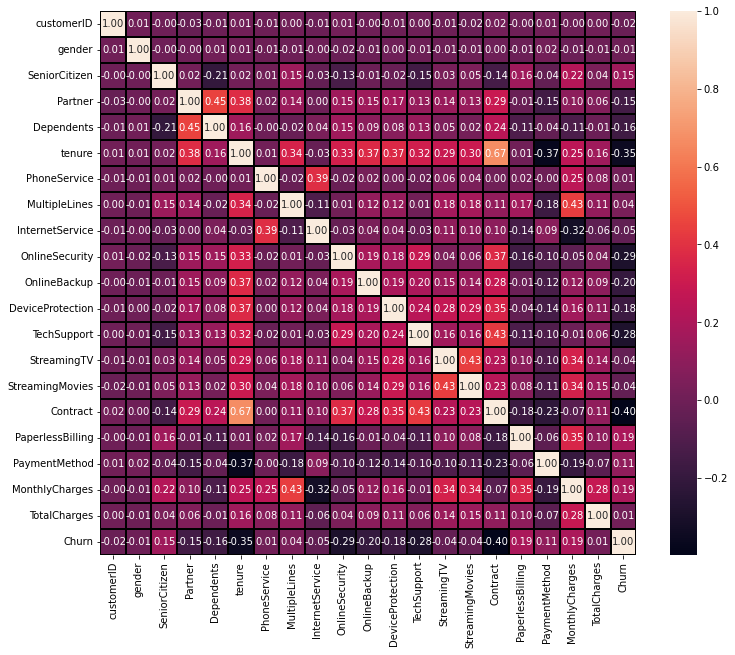

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,linewidths=2,linecolor='Black',fmt='.2f')

# checking the columns which are positively and negatively correlated to the target variable.

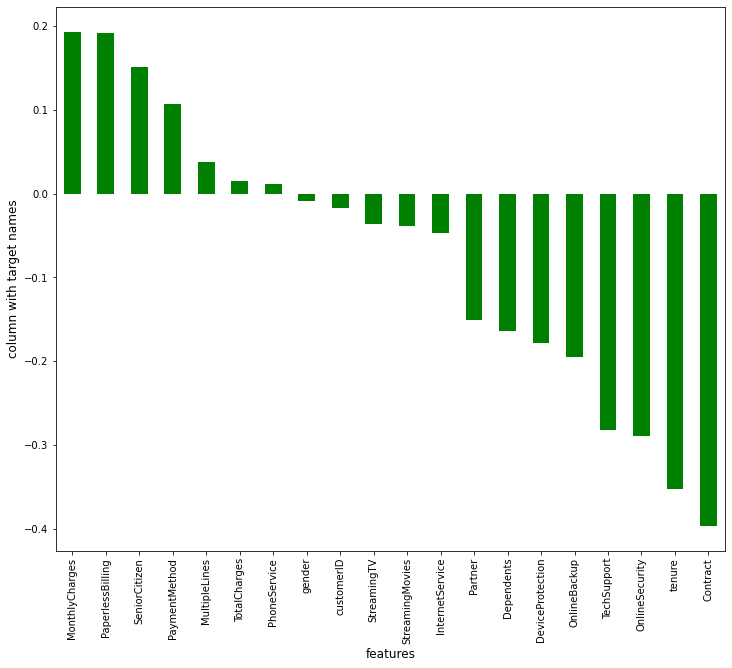

In [49]:
plt.figure(figsize=(12,10))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='g')
plt.xlabel('features',fontsize=12)
plt.ylabel('column with target names',fontsize=12)
plt.show()

# Outliers Checking

In [50]:
collist=df.columns.values
ncol=30
nrow=14

In [51]:
collist

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [52]:
for i in range(0,len(collist)):
    print(collist[i])
    break

customerID


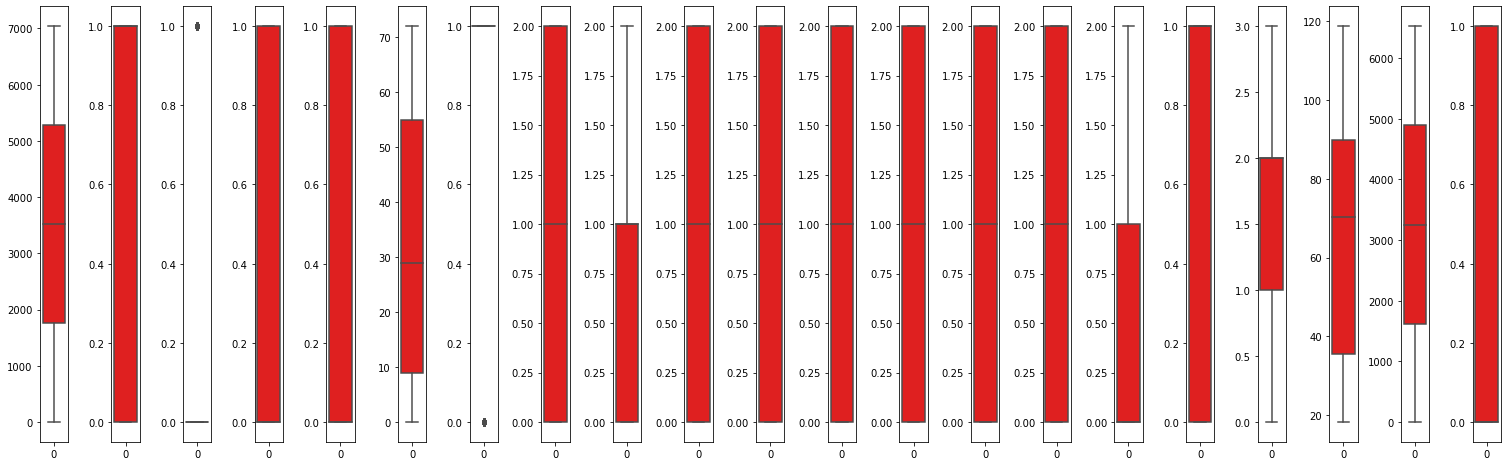

In [53]:
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data = df[collist[i]],color='red',orient='v')
    plt.tight_layout()

In [54]:
from scipy.stats import zscore
import numpy as np

In [55]:
(np.abs(zscore(df))<3).all().all()

False

As the result is false so there are outliers present in the data set which will be treated.

# Removing Outliers

zscore Technique

In [56]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [57]:
df_new=df[(z<3).all(axis=1)]

In [58]:
df_new

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
5,6551,0,0,0,0,8,1,2,1,0,...,2,0,2,2,0,1,2,99.65,6104,1
6,1002,1,0,0,1,22,1,2,1,0,...,0,0,2,0,0,1,1,89.10,1550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758,0,0,0,0,72,1,0,2,1,...,1,1,1,1,2,1,0,21.15,770,0
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,5698,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,2660,1


In [59]:
df_new.shape

(6361, 21)

In [60]:
df.shape

(7043, 21)

In [61]:
data_loss=((7043-6361)/7043)*100

In [62]:
data_loss

9.683373562402386

This is the percentage of data lost

OUTLIERS HAS BEEN REMOVED FROM THE DATA.

# Seperating features and the target variable

In [63]:
features=df_new.drop('Churn',axis=1)
target=df_new['Churn']

# checking skewness in Data and Removing it

In [64]:
features.skew()

customerID          0.006843
gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges       -0.041683
dtype: float64

keeping -/+0.5 as the range of skewness. Here are the columns that are not in range.

In [67]:
from sklearn.preprocessing import power_transform

In [68]:
features.skew().sort_values(ascending=False)

SeniorCitizen       1.823376
Dependents          0.876594
Contract            0.629701
OnlineSecurity      0.422032
TechSupport         0.409833
tenure              0.237945
DeviceProtection    0.183254
OnlineBackup        0.167910
MultipleLines       0.132058
Partner             0.056316
InternetService     0.049126
customerID          0.006843
PhoneService        0.000000
StreamingTV        -0.002734
StreamingMovies    -0.010025
gender             -0.014781
TotalCharges       -0.041683
PaymentMethod      -0.169889
PaperlessBilling   -0.386613
MonthlyCharges     -0.399139
dtype: float64

we are using YEO JOHNSON method

In [69]:
features_n=power_transform(features,method='yeo-johnson')

In [70]:
pd.DataFrame(features_n,columns=features.columns).skew().sort_values(ascending=False)

SeniorCitizen       1.823376
Dependents          0.876594
Contract            0.301765
MultipleLines       0.132058
OnlineSecurity      0.131110
TechSupport         0.123477
Partner             0.056316
PhoneService        0.000000
DeviceProtection   -0.014523
gender             -0.014781
OnlineBackup       -0.023610
InternetService    -0.108986
StreamingTV        -0.122478
StreamingMovies    -0.126613
PaymentMethod      -0.207901
tenure             -0.243524
customerID         -0.287288
TotalCharges       -0.310817
MonthlyCharges     -0.331859
PaperlessBilling   -0.386613
dtype: float64

In [71]:
type(features_n)

numpy.ndarray

In [72]:
features.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [73]:
features=pd.DataFrame(features_n,columns=features.columns)

In [74]:
features.skew().sort_values(ascending=False)

SeniorCitizen       1.823376
Dependents          0.876594
Contract            0.301765
MultipleLines       0.132058
OnlineSecurity      0.131110
TechSupport         0.123477
Partner             0.056316
PhoneService        0.000000
DeviceProtection   -0.014523
gender             -0.014781
OnlineBackup       -0.023610
InternetService    -0.108986
StreamingTV        -0.122478
StreamingMovies    -0.126613
PaymentMethod      -0.207901
tenure             -0.243524
customerID         -0.287288
TotalCharges       -0.310817
MonthlyCharges     -0.331859
PaperlessBilling   -0.386613
dtype: float64

# Training Process Begins

# Balancing The Data

In [75]:
from imblearn.over_sampling import SMOTE

In [76]:
sm=SMOTE()
fea_res,tar_res=sm.fit_resample(features,target)

In [77]:
fea_res.value_counts()

customerID  gender     SeniorCitizen  Partner    Dependents  tenure     PhoneService   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges
-2.195947   -1.007416  -0.441591       1.028548   1.529987   -0.857905  -2.384186e-07  -0.936163      -1.398221        -0.992711        1.170277     -1.097257          1.268751     1.102254    -1.189604         0.789436   0.825243          1.319167      -0.086462        0.822492       1
 0.570673    0.992638  -0.441591      -0.972245  -0.653600   -1.645472  -2.384186e-07  -0.936163       0.102542        -0.992711       -1.104348     -1.097257         -0.997781    -1.186007     1.099395        -0.888722   0.825243          0.411006       0.428519        1.321151       1
 0.577164   -1.007416  -0.441591       1.028548  -0.653600    0.311398  -2.384186e-07   1.068190       0.060033        -0.992711       -1.104

In [78]:
tar_res.value_counts()

0    4662
1    4662
Name: Churn, dtype: int64

# Finding Best Random State

In [79]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [80]:
maxaccu=0
maxRs=0
for i in range(0,200):
    fea_res_train,fea_res_test,tar_res_train,tar_res_test=train_test_split(fea_res,tar_res,test_size=.20,random_state=i)
    dt.fit(fea_res_train,tar_res_train)
    pre_train=dt.predict(fea_res_test)
    acc=accuracy_score(tar_res_test,pre_train)
    print('accuracy',acc,'random_state',i)
    
    if acc>maxaccu:
        maxaccu=acc
        maxRs=i
        print('maximum accuracy',maxaccu,'maximum random state',maxRs)

accuracy 0.7983914209115281 random_state 0
maximum accuracy 0.7983914209115281 maximum random state 0
accuracy 0.7882037533512064 random_state 1
accuracy 0.7951742627345845 random_state 2
accuracy 0.7967828418230563 random_state 3
accuracy 0.7924932975871314 random_state 4
accuracy 0.7806970509383379 random_state 5
accuracy 0.7967828418230563 random_state 6
accuracy 0.8058981233243968 random_state 7
maximum accuracy 0.8058981233243968 maximum random state 7
accuracy 0.7871313672922252 random_state 8
accuracy 0.7823056300268096 random_state 9
accuracy 0.7876675603217158 random_state 10
accuracy 0.8053619302949062 random_state 11
accuracy 0.7941018766756032 random_state 12
accuracy 0.7935656836461126 random_state 13
accuracy 0.7989276139410187 random_state 14
accuracy 0.7758713136729223 random_state 15
accuracy 0.7903485254691689 random_state 16
accuracy 0.7758713136729223 random_state 17
accuracy 0.788739946380697 random_state 18
accuracy 0.8085790884718499 random_state 19
maximum accur

In [81]:
print('best accuracy score',maxaccu ,'on random state',maxRs)

best accuracy score 0.8128686327077748 on random state 57


# Create train test split

In [83]:
fea_res_train,fea_res_test,tar_res_train,tar_res_test=train_test_split(fea_res,tar_res,test_size=.20,random_state=57)

In [84]:
fea_res_train.shape

(7459, 20)

In [85]:
fea_res_test.shape

(1865, 20)

In [86]:
tar_res_train.shape

(7459,)

In [87]:
tar_res_test.shape

(1865,)

# Decision Tree Classifier

In [88]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(fea_res_train,tar_res_train)
pre_train=dt.predict(fea_res_test)
print('accuracy',accuracy_score(tar_res_test,pre_train)*100)
print(confusion_matrix(tar_res_test,pre_train))
print(classification_report(tar_res_test,pre_train))

accuracy 79.94638069705093
[[775 177]
 [197 716]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       952
           1       0.80      0.78      0.79       913

    accuracy                           0.80      1865
   macro avg       0.80      0.80      0.80      1865
weighted avg       0.80      0.80      0.80      1865



# Random Forest Classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=300)
rf.fit(fea_res_train,tar_res_train)
pre_train=rf.predict(fea_res_test)
print('accuracy',accuracy_score(tar_res_test,pre_train)*100)
print(confusion_matrix(tar_res_test,pre_train))
print(classification_report(tar_res_test,pre_train))

accuracy 87.39946380697052
[[818 134]
 [101 812]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       952
           1       0.86      0.89      0.87       913

    accuracy                           0.87      1865
   macro avg       0.87      0.87      0.87      1865
weighted avg       0.87      0.87      0.87      1865



# K Neighbors classifier

In [94]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(fea_res_train,tar_res_train)
pre_train=knn.predict(fea_res_test)
print('accuracy',accuracy_score(tar_res_test,pre_train)*100)
print(confusion_matrix(tar_res_test,pre_train))
print(classification_report(tar_res_test,pre_train))

accuracy 81.23324396782841
[[674 278]
 [ 72 841]]
              precision    recall  f1-score   support

           0       0.90      0.71      0.79       952
           1       0.75      0.92      0.83       913

    accuracy                           0.81      1865
   macro avg       0.83      0.81      0.81      1865
weighted avg       0.83      0.81      0.81      1865



# support vector classifier

In [95]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(fea_res_train,tar_res_train)
pre_train=svc.predict(fea_res_test)
print('accuracy',accuracy_score(tar_res_test,pre_train)*100)
print(confusion_matrix(tar_res_test,pre_train))
print(classification_report(tar_res_test,pre_train))

accuracy 83.48525469168901
[[751 201]
 [107 806]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       952
           1       0.80      0.88      0.84       913

    accuracy                           0.83      1865
   macro avg       0.84      0.84      0.83      1865
weighted avg       0.84      0.83      0.83      1865



# AdaBoost Classifier

In [96]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(fea_res_train,tar_res_train)
pre_train=ad.predict(fea_res_test)
print('accuracy',accuracy_score(tar_res_test,pre_train)*100)
print(confusion_matrix(tar_res_test,pre_train))
print(classification_report(tar_res_test,pre_train))

accuracy 81.34048257372655
[[747 205]
 [143 770]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       952
           1       0.79      0.84      0.82       913

    accuracy                           0.81      1865
   macro avg       0.81      0.81      0.81      1865
weighted avg       0.82      0.81      0.81      1865



# Cross Validation

In [97]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt,fea_res,tar_res,cv=9)
print('cross validation score for Decision tree model =', scr.mean())

cross validation score for Decision tree model = 0.7964392964392965


In [98]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf,fea_res,tar_res,cv=9)
print('cross validation score for Random Forest Classifier  model =', scr.mean())

cross validation score for Random Forest Classifier  model = 0.8665808665808665


In [99]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(knn,fea_res,tar_res,cv=9)
print('cross validation score for K Neighbors classifiermodel =', scr.mean())

cross validation score for K Neighbors classifiermodel = 0.8001930501930502


In [100]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(svc,fea_res,tar_res,cv=9)
print('cross validation score for Support Vector classifiermodel =', scr.mean())

cross validation score for Support Vector classifiermodel = 0.8202488202488203


In [101]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(ad,fea_res,tar_res,cv=9)
print('cross validation score for ada Boost classifiermodel =', scr.mean())

cross validation score for ada Boost classifiermodel = 0.8116688116688118


# Random Forest Classifier is perfoming best among all the other models so we'll continue with it

# Hyper parameter tunning

In [102]:
RandomForestClassifier()

RandomForestClassifier()

In [103]:
#these are the parameters.
from sklearn.model_selection import GridSearchCV
parameters={'max_features':['auto','sqrt','log2'], 'max_depth':[4,5,6,7,8],'criterion':['ginni','entropy'],
           'n_estimators':[100,200,300,400,500]}

# using GridsearchCV

In [104]:
#usng gridsearch cv and random forest parameters.
gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=9,scoring="accuracy")
gcv.fit(fea_res_train,tar_res_train)
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 400}

In [105]:
#finding the best estimator using grid search cv
gcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       n_estimators=400)

In [106]:
#predicting the best one now
gcv_pred=gcv.best_estimator_.predict(fea_res_test)
accuracy_score=(tar_res_test,gcv_pred)

In [107]:
#this is the accuracy score
accuracy_score

(77      0
 1197    0
 4650    1
 1461    0
 3234    0
        ..
 1466    0
 2141    1
 3375    0
 2068    0
 2258    0
 Name: Churn, Length: 1865, dtype: int32,
 array([0, 0, 1, ..., 0, 0, 0]))

# ROC AUC curve

# Making ROC AUC Curve

<function matplotlib.pyplot.show(close=None, block=None)>

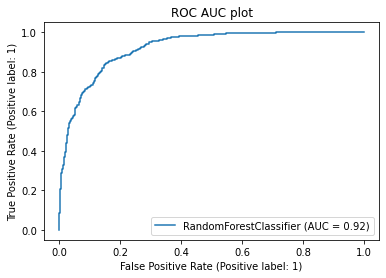

In [108]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gcv.best_estimator_,fea_res_test,tar_res_test)
plt.title('ROC AUC plot')
plt.show

AUC IS 0.92

# saving model

In [261]:
import joblib
joblib.dump(gcv.best_estimator_,'customer_churn.pkl')

['customer_churn.pkl']